In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import torch

In [12]:
path = r'D:\0-3dmm\3d-motion-mag\logs\blender\lego_3Hz_0_005\output\000\model.pth'
data = torch.load(path)

In [13]:
data['model'].keys()
data = data['model']

odict_keys(['field.aabb', 'field.grids.0.0', 'field.grids.0.1', 'field.grids.0.2', 'field.delta_grids.0.0', 'field.delta_grids.0.1', 'field.delta_grids.0.2', 'field.direction_encoder.params', 'field.sigma_net.params', 'field.color_net.params', 'proposal_networks.0.aabb', 'proposal_networks.0.grids.0', 'proposal_networks.0.grids.1', 'proposal_networks.0.grids.2', 'proposal_networks.0.sigma_net.params', 'proposal_networks.1.aabb', 'proposal_networks.1.grids.0', 'proposal_networks.1.grids.1', 'proposal_networks.1.grids.2', 'proposal_networks.1.sigma_net.params'])

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        grid_value[f"grid{grid_id1}{grid_id2}"] = data[f'field.grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}",data[f'field.grids.{grid_id1}.{grid_id2}'].shape)

delta_grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        delta_grid_value[f"delta_grid{grid_id1}{grid_id2}"] = data[f'field.delta_grids.{grid_id1}.{grid_id2}']
        print(f"delta_grid{grid_id1}{grid_id2}",data[f'field.delta_grids.{grid_id1}.{grid_id2}'].shape)

def visualize_tensor(tensor):
    # 假设 batch size 为 1，移除 batch 维度
    tensor = tensor.squeeze(0)

    # 确保有 16 个通道
    assert tensor.size(0) == 32

    # 设置画布大小
    plt.figure(figsize=(15, 15))

    # 创建 4x4 的 GridSpec 网格
    gs = gridspec.GridSpec(4, 4)

    for i in range(tensor.size(0)):
        # 为每个通道的图像创建子图
        if i >=16:break
        ax = plt.subplot(gs[i])
        
        # 显示图像
        ax.imshow(tensor[i], cmap='twilight')
        ax.axis('off')
    
    # 调整子图布局
#     plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)
    plt.show()

grid00 torch.Size([1, 32, 512, 512])
grid01 torch.Size([1, 32, 512, 512])
grid02 torch.Size([1, 32, 512, 512])
delta_grid00 torch.Size([1, 32, 512, 512])
delta_grid01 torch.Size([1, 32, 512, 512])
delta_grid02 torch.Size([1, 32, 512, 512])


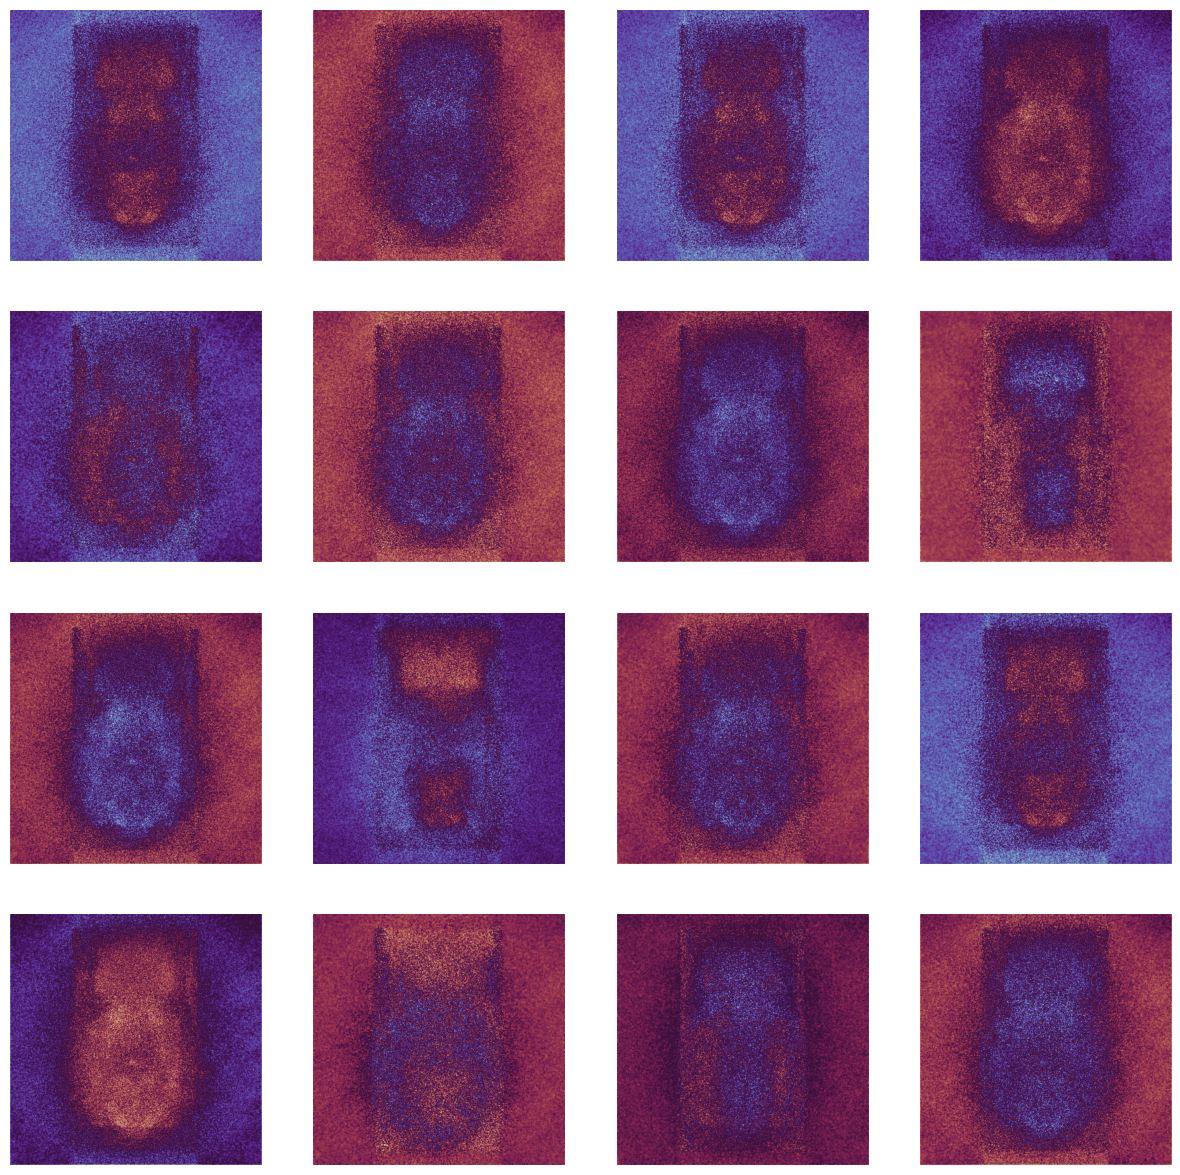

In [15]:
visualize_tensor(grid_value[f"grid00"].cpu())

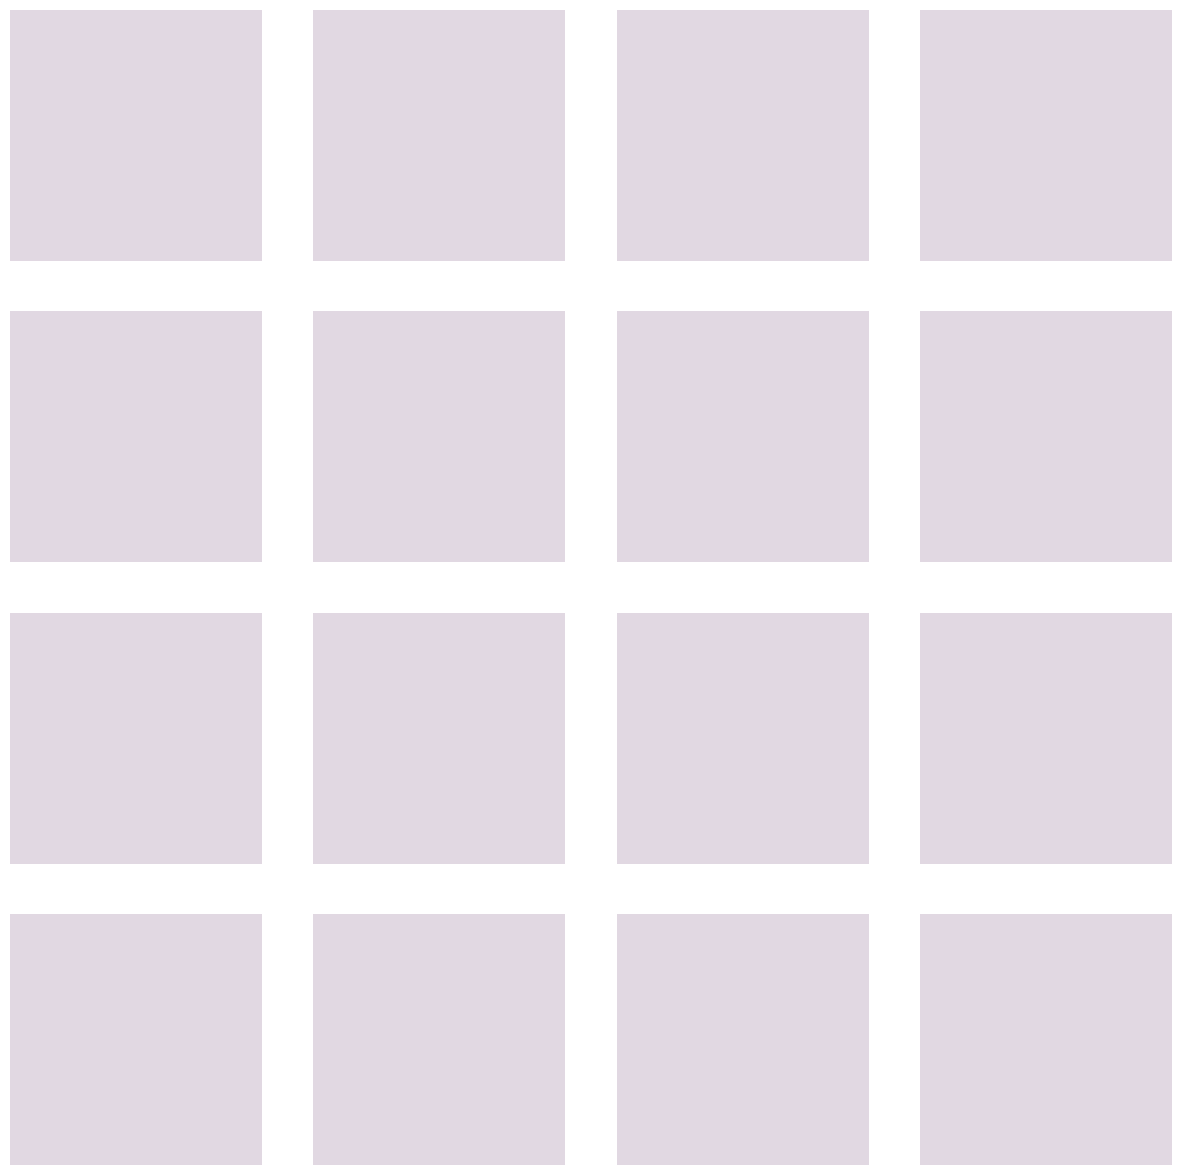

In [16]:
visualize_tensor(delta_grid_value[f"delta_grid00"].cpu())